In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NL_5.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,NaN,...,NaN,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,NaN,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,NaN,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,NaN,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,0.0,0.348,0.0,1.160,NaN,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,NaN,0.00,NaN,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,NaN,0.000,NaN,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	203
float64		column 2	261
float64		column 3	261
float64		column 4	319
float64		column 5	261
float64		column 6	178
float64		column 7	178
float64		column 8	290
float64		column 9	319
float64		column 10	265
float64		column 11	261
float64		column 12	58
float64		column 13	203
float64		column 14	178
float64		column 15	145
float64		column 16	232
float64		column 17	290
float64		column 18	178
float64		column 19	232
float64		column 20	352
float64		column 21	290
float64		column 22	265
float64		column 23	232
float64		column 24	174
float64		column 25	290
float64		column 26	261
float64		column 27	174
float64		column 28	294
float64		column 29	87
float64		column 30	232
float64		column 31	261
float64		column 32	319
float64		column 33	174
float64		column 34	377
float64		column 35	174
float64		column 36	352
float64		column 37	232
float64		column 38	116
float64		column 39	203
float64		column 40	207
float64		column 41	203
float64		column 42	203
float64

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4394.000000,4336.000000,4336.000000,4278.000000,4336.000000,4419.000000,4419.000000,4307.000000,4278.000000,4332.000000,...,4423.000000,4419.000000,4452.000000,4365.000000,4361.000000,4274.000000,4423.000000,4423.000000,4394.000000,4278.000000
mean,0.100494,0.207761,0.276462,0.047835,0.306603,0.092711,0.112799,0.105001,0.085489,0.231692,...,0.032134,0.037106,0.136916,0.016550,0.267113,0.072324,0.043674,5.246537,51.906463,272.176952
std,0.301895,1.287646,0.498277,1.154992,0.660424,0.271504,0.388869,0.406869,0.273619,0.642451,...,0.290406,0.238084,0.269066,0.107752,0.820627,0.240940,0.436545,32.329098,197.520954,578.899630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.598500,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065500,0.000000,0.000000,0.000000,0.000000,2.285000,15.000000,95.000000
75%,0.000000,0.000000,0.410000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.140000,...,0.000000,0.000000,0.185000,0.000000,0.310000,0.050000,0.000000,3.714500,43.000000,261.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.367000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

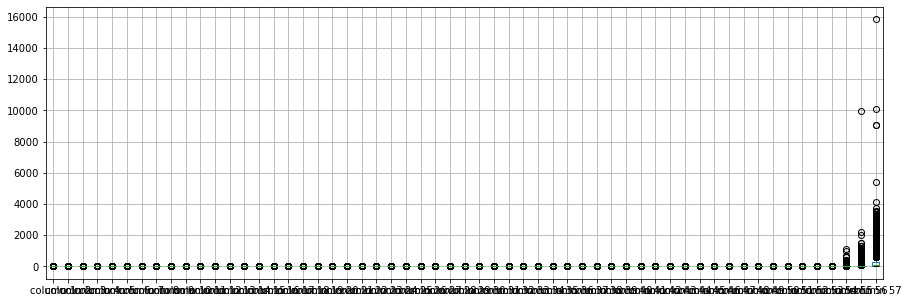

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.100494
column 2       0.207761
column 3       0.276462
column 4       0.047835
column 5       0.306603
column 6       0.092711
column 7       0.112799
column 8       0.105001
column 9       0.085489
column 10      0.231692
column 11      0.057281
column 12      0.539581
column 13      0.091934
column 14      0.055933
column 15      0.047619
column 16      0.237704
column 17      0.133761
column 18      0.181765
column 19      1.660889
column 20      0.075564
column 21      0.789812
column 22      0.110686
column 23      0.097045
column 24      0.091834
column 25      0.523415
column 26      0.259446
column 27      0.749740
column 28      0.115564
column 29      0.096381
column 30      0.098561
column 31      0.059470
column 32      0.044666
column 33      0.095428
column 34      0.042095
column 35      0.102715
column 36      0.096144
column 37      0.132048
column 38      0.013042
column 39      0.073514
column 40      0.063984
column 41      0.041516
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.028524,0.061232,-0.001189,0.024209,0.061747,0.005282,-0.000681,0.095326,0.033445,...,-0.021400,-0.025159,-0.017374,-0.031205,0.050129,0.114235,-0.011034,0.048085,0.061810,0.079839
column 2,-0.028524,1.000000,-0.029556,-0.005238,-0.022857,-0.025405,0.002063,-0.014923,-0.003094,0.034218,...,-0.016549,-0.008318,-0.048616,-0.018453,-0.017270,-0.007344,0.002630,0.003868,0.001581,-0.022211
column 3,0.061232,-0.029556,1.000000,-0.009837,0.080572,0.085455,0.038201,0.012993,0.081903,0.033428,...,-0.025887,-0.035579,-0.022950,-0.035836,0.134889,0.088828,0.007926,0.095522,0.101493,0.078579
column 4,-0.001189,-0.005238,-0.009837,1.000000,-0.005249,-0.012680,0.022443,0.006312,0.003739,-0.004765,...,0.000810,0.002915,-0.013522,-0.006014,-0.001456,0.012529,0.002227,0.005999,0.020630,0.029825
column 5,0.024209,-0.022857,0.080572,-0.005249,1.000000,0.057259,0.152352,0.031310,0.016732,0.033522,...,-0.030047,-0.030484,-0.057971,-0.033079,0.025502,0.039219,0.006310,0.050522,0.079826,0.006583
column 6,0.061747,-0.025405,0.085455,-0.012680,0.057259,1.000000,0.058947,0.078592,0.107909,0.009032,...,-0.031812,-0.018569,-0.007667,-0.012655,0.059343,0.103561,0.016969,-0.011629,0.073123,0.080004
column 7,0.005282,0.002063,0.038201,0.022443,0.152352,0.058947,1.000000,0.051718,0.051750,0.059797,...,-0.030177,-0.031279,-0.048491,-0.024969,0.052656,0.063686,0.046685,0.046271,0.056035,-0.005376
column 8,-0.000681,-0.014923,0.012993,0.006312,0.031310,0.078592,0.051718,1.000000,0.084538,0.068483,...,-0.023748,-0.025177,-0.031481,-0.016325,0.028206,0.050317,-0.010197,0.009282,0.032913,0.037782
column 9,0.095326,-0.003094,0.081903,0.003739,0.016732,0.107909,0.051750,0.084538,1.000000,0.116105,...,-0.024343,-0.014296,-0.029927,0.020908,0.039902,0.141855,-0.003238,0.105850,0.278911,0.245772
column 10,0.033445,0.034218,0.033428,-0.004765,0.033522,0.009032,0.059797,0.068483,0.116105,1.000000,...,-0.019825,0.013822,0.008106,0.008490,0.036694,0.070546,0.047602,0.074040,0.099387,0.082520


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+20,17+20+20,17+20+20+20,17+20+20,17+20,17], vae_layer = False, seed = 200)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 607.7015083126905
Epoch: 1 , loss: 616.4517584611315
Epoch: 2 , loss: 608.2275355003437
Epoch: 3 , loss: 605.8792329316356
Epoch: 4 , loss: 610.0913114647417
Epoch: 5 , loss: 607.6267851719873
Epoch: 6 , loss: 614.4833608487758
Epoch: 7 , loss: 610.6899849762069
Epoch: 8 , loss: 606.5102430868648
Epoch: 9 , loss: 607.4400702287096
Epoch: 10 , loss: 600.0864055248088
Epoch: 11 , loss: 570.5424686126178
Epoch: 12 , loss: 493.7890269316032
Epoch: 13 , loss: 472.2458705569809
Epoch: 14 , loss: 474.27257476700305
Epoch: 15 , loss: 472.83316935894794
Epoch: 16 , loss: 459.58619897290805
Epoch: 17 , loss: 449.20360387077733
Epoch: 18 , loss: 451.6304254299257
Epoch: 19 , loss: 463.2541188362999
Epoch: 20 , loss: 456.15535358601744
Epoch: 21 , loss: 437.0205308335999
Epoch: 22 , loss: 454.45389580809695
Epoch: 23 , loss: 448.465173595043
Epoch: 24 , loss: 484.1755065120471
Epoch: 25 , loss: 449.77855884405795


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000000
column 2      0.000000
column 3      0.000000
column 4      0.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     0.000000
column 16     0.000000
column 17     0.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.134921
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     0.000000
column 33     0.000000
column 34     0.000000
column 35     0.000000
column 36     0.039422
column 37     0.000000
column 38     0.000000
column 39     0.000000
column 40     0.000000
column 41     0.000000
column 42     0.000000
column 43     0.000000
column 44  

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.157371,...,0.025104,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.010558,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.000000,0.0,-0.10548,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,-0.057082,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.005129,0.0,0.00000,0.0,0.000000,0.012497,0.000000,0.0,0.0,0.0
4593,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.13015,0.0,0.085058,...,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
4594,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.000000,0.0,0.00000,0.0,0.316351,0.000000,-0.427873,0.0,0.0,0.0
4595,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,...,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

16573.445540940334

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.3492186198201119

In [19]:
new_df.iloc[66,:]

column 1       0.000000
column 2       0.440000
column 3       0.890000
column 4       0.000000
column 5       0.440000
column 6       0.000000
column 7       0.000000
column 8       0.000000
column 9       0.000000
column 10      0.000000
column 11      0.000000
column 12      0.440000
column 13      0.000000
column 14      0.000000
column 15      0.000000
column 16      0.440000
column 17      0.000000
column 18      0.210782
column 19      2.240000
column 20     -0.049148
column 21      1.340000
column 22      0.000000
column 23      0.000000
column 24      0.000000
column 25      0.000000
column 26      0.000000
column 27      0.176899
column 28      0.000000
column 29      0.000000
column 30      0.000000
column 31      0.000000
column 32      0.000000
column 33     -0.103468
column 34      0.000000
column 35      0.000000
column 36      0.000000
column 37      0.000000
column 38      0.000000
column 39      0.000000
column 40      0.000000
column 41      0.000000
column 42      0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.640000,0.64,0.000000,0.32,0.00,0.00,0.00000,0.00,0.157371,...,0.025104,0.0,0.00000,0.0,0.778000,0.000000,0.000000,3.756,61.0,278.0
1,0.210000,0.280000,0.50,0.010558,0.14,0.28,0.21,0.07000,0.00,0.940000,...,0.000000,0.0,0.13200,0.0,0.372000,0.180000,0.048000,5.114,101.0,1028.0
2,0.000000,0.000000,0.00,0.000000,0.63,0.00,0.31,0.63000,0.31,0.630000,...,0.000000,0.0,0.13500,0.0,0.135000,0.000000,0.000000,3.537,40.0,191.0
3,0.000000,0.000000,0.00,0.000000,1.85,0.00,0.00,1.85000,0.00,0.000000,...,0.000000,0.0,0.11752,0.0,0.000000,0.000000,0.000000,3.000,15.0,54.0
4,-0.057082,0.000000,0.00,0.000000,1.92,0.00,0.00,0.00000,0.00,0.640000,...,0.000000,0.0,0.05400,0.0,0.164000,0.054000,0.000000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.000000,0.64,0.000000,0.00,0.00,0.00,0.00000,0.00,0.000000,...,0.005129,0.0,0.34800,0.0,1.160000,0.012497,0.000000,3.121,15.0,103.0
4593,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.13015,0.00,0.085058,...,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,3.043,15.0,70.0
4594,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00000,0.00,0.000000,...,0.000000,0.0,0.13600,0.0,0.316351,0.000000,-0.018873,1.837,12.0,68.0
4595,0.170000,0.000000,0.68,0.000000,0.34,0.34,0.00,0.00000,0.00,0.000000,...,0.000000,0.0,0.03200,0.0,0.065000,0.000000,0.000000,1.189,5.0,69.0


In [21]:
imputations[-1].to_excel("Spam_NL_5(imp).xlsx", index=False, header=False)